<h3>Importing main libraries for analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

<h3>First look at the data

In [2]:
data =  pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')

In [3]:
data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [4]:
data.tail()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,1643866177,wifi,Verizon,US,Elmira
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860078,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 03:11:44,1643847104,2022-02-03 21:12:34,1643911954,cell,Verizon,US,Cherry Hill


As is clear from the first observation of the data, we have one column in JSON format that needs to be expanded, since the necessary data is there.

In [5]:
data.isnull().sum()

profile_id                     14
os_version                      0
device_manufacturer             0
device_model                    0
device_type                     0
device_locale                   0
event_name                      0
event_json                      0
event_datetime                  0
event_timestamp                 0
event_receive_datetime          0
event_receive_timestamp         0
connection_type                 0
operator_name               18879
country_iso_code                0
city                       323708
dtype: int64

In [6]:
data = data.dropna(subset=['profile_id'])
data.profile_id.isnull().sum()

0

I had to delete 14 records, because among the entire sample of 860 thousand data, this is an insignificant amount.

<h4>Parsing JSON column

In [7]:
event_json_type = type(data['event_json'][0])
print(f'The type of event_json column: {event_json_type}')

event_json_sample = data['event_json'][0]
print(f'Printing a one row of column as dict: {event_json_sample}')

The type of event_json column: <class 'str'>
Printing a one row of column as dict: {"ad_type":"banner","placement":"","view_index":1,"session_view_index":0,"cur_ticks":637795729492245130,"session_length":705.8807,"revenue":0.000510313,"ads_ltv":0.487876676518837,"ecpm_sma":0.511508107185364,"normalized_ecpm_sma":0.511508107185364,"value":0.000510313,"currency":"USD","ad_country_code":"US","network_name":"Google AdMob","ad_unit_id":"64c6b1114ea8c1cc","ad_network_placement":"ca-app-pub-7511632782617496/8825263691","creativeId":"CJ3XirfD5vUCFYPnKAUdG3MOYQ"}


In [8]:
event = data['event_json'].apply(json.loads)
event_list = list(event)
event_list_json = json.dumps(event_list)

In [9]:
new_data = data
new_data = new_data.join(pd.read_json(event_list_json))
del(new_data['event_json'])
new_data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


In [10]:
json_data = pd.read_json(event_list_json)
json_data.head()

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


In this case, I decided to completely parse the json data to make it easier to interact with them in the future and conduct a more correct analysis.

<h3> Analysis

In [11]:
new_data.ad_type.unique()

array(['banner', 'int', 'rv', nan], dtype=object)

As we know from the condition of the problem, there are three types of advertising, but I brought them out to better remember

In [12]:
new_data['eCPM'] = new_data.revenue * 1000
new_data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId,eCPM
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ,0.510313
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ,0.510313
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58,2.386163
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364,13.893784
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw,6.827570


According to the condition of the problem, this column gave us a new value

<h4>Task 1b

In [13]:
x = new_data.groupby('profile_id')['eCPM'].mean()
x

profile_id
JL00qCZH1HV     3.183940
JL015rw9vmN     3.527347
JL01aCdFTJy     1.171593
JL04ODuw9UP     3.787363
JL06OWhBYxn     0.297621
                 ...    
JMLQTj4i34Y    10.207943
JMLY5SO7wmn     2.351371
JMLmauy744E     0.432453
JMLt54Rmui5     6.557208
JMML6MrvRA4     2.118834
Name: eCPM, Length: 4226, dtype: float64

This variable has average values grouped by users

In [15]:
def normal_distribution(x, mean, std):
    formula = (np.pi * std) * np.exp(-0.5*((x - mean) / std)**2)
    return formula

This function gives us the normal distribution of data

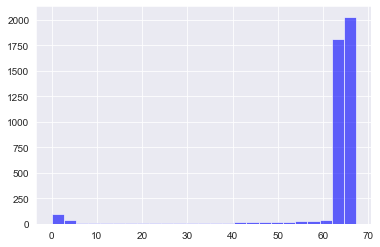

In [23]:
pdf = normal_distribution(x, x.mean(), x.std())
plt.hist(pdf, bins=25, alpha=0.6, color='b')
plt.show()

This distribution cannot be normal due to the fact that the number of players who watch ads varies greatly

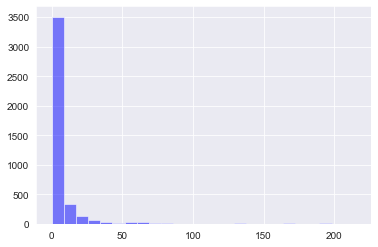

In [22]:
plt.hist(x, bins=25, alpha=0.5, color='b')
plt.show()

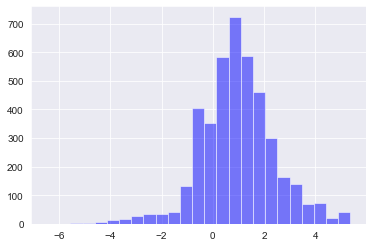

In [24]:
plt.hist(np.log(x), bins=25, alpha=0.5, color='b')
plt.show()

As we can see now, our distribution is now more like a normal one.

The reason why I could not display this graph above is that in fact our data has a log-normal distribution.

<h4>Task 1b

In [25]:
x = new_data.groupby('city')['eCPM'].mean()
x

city
Aberdeen      3.241509
Abilene       5.492133
Addison       0.068850
Afton         2.048100
Akron         7.375437
                ...   
Youngstown    3.490887
Ypsilanti     1.837311
Yukon         1.833623
Yuma          1.272082
Zanesville    2.129764
Name: eCPM, Length: 920, dtype: float64

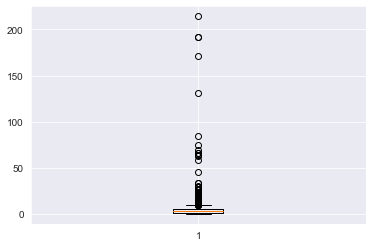

In [26]:
plt.boxplot(x)
plt.show()

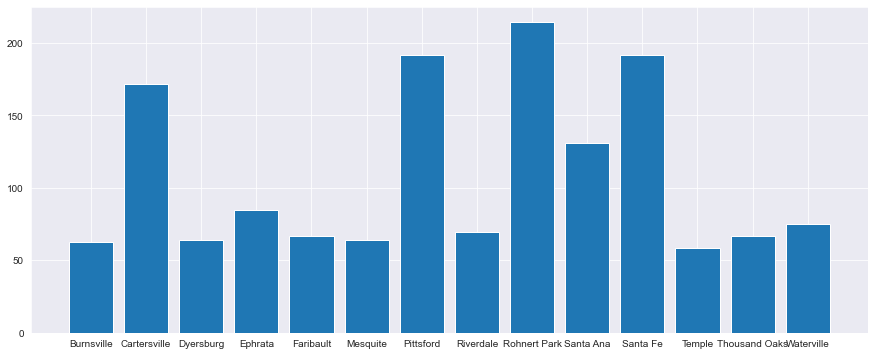

In [35]:
new_x = x[x >= 50]
plt.figure(figsize=(15, 6))
plt.bar(new_x.index, new_x)
plt.show()

These cities bring, in my opinion, the main profit for the company namely those cities where the average gives more than a profit of 50

In [36]:
x = new_data.groupby('os_version')['eCPM'].mean()
x

os_version
10       2.281999
11       2.781259
12       3.138788
5.0.2    0.705805
6.0.1    1.528732
7.0      2.941484
7.1.1    2.005064
7.1.2    0.637282
8.0.0    1.708112
8.1.0    1.540559
9        2.103476
Name: eCPM, dtype: float64

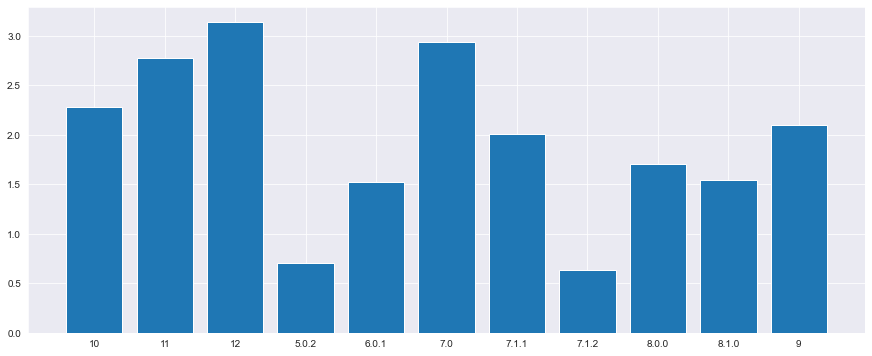

In [37]:
plt.figure(figsize=(15, 6))
plt.bar(x.index, x)
plt.show()

As you can see here, the version of the Operating System has a high value, because the old OS like 5.0.2, 6.0.1, 7.1.2 show the lowest result. It depends on the optimization of the OS as well as support devices, it is also possible to note the inconstancy of old OSes, since, namely, OSes that are less than version 8, there is a high deviation, which cannot be said about OS versions from 8 and higher, which show very stable results.

<h4>Task 1c

In [40]:
x = new_data.groupby('city')['eCPM'].sum()
x

city
Aberdeen       333.875442
Abilene        307.559443
Addison          0.068850
Afton          796.710953
Akron         2758.413351
                 ...     
Youngstown    1061.229590
Ypsilanti     2963.582979
Yukon         2145.339143
Yuma           150.105681
Zanesville    2508.862569
Name: eCPM, Length: 920, dtype: float64

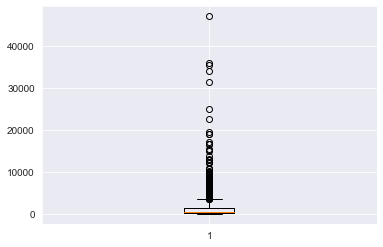

In [41]:
plt.boxplot(x)
plt.show()

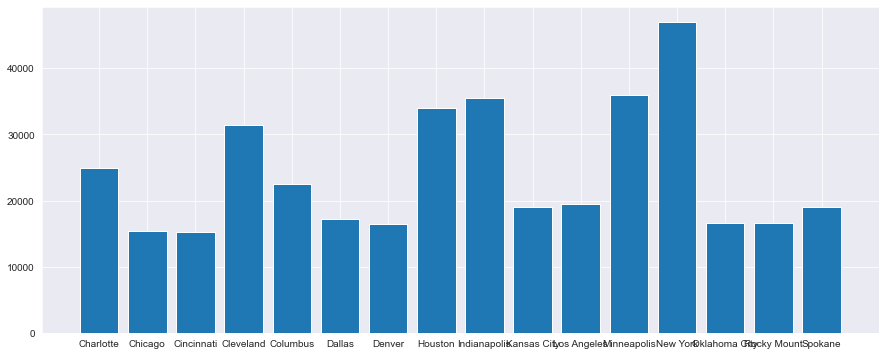

In [42]:
new_x = x[x >= 15000]
plt.figure(figsize=(15, 6))
plt.bar(new_x.index, new_x)
plt.show()

In the statement above, I was mistaken, since the data of the city are the main level of income, since the total data of the city gives from $ 15,000

In [46]:
x = new_data.groupby('os_version')['eCPM'].sum()
x

os_version
10       3.442874e+05
11       5.814416e+05
12       1.279285e+06
5.0.2    5.004156e+02
6.0.1    1.076227e+03
7.0      1.193360e+04
7.1.1    2.690796e+03
7.1.2    1.154118e+03
8.0.0    1.369222e+04
8.1.0    1.424863e+04
9        1.402219e+05
Name: eCPM, dtype: float64

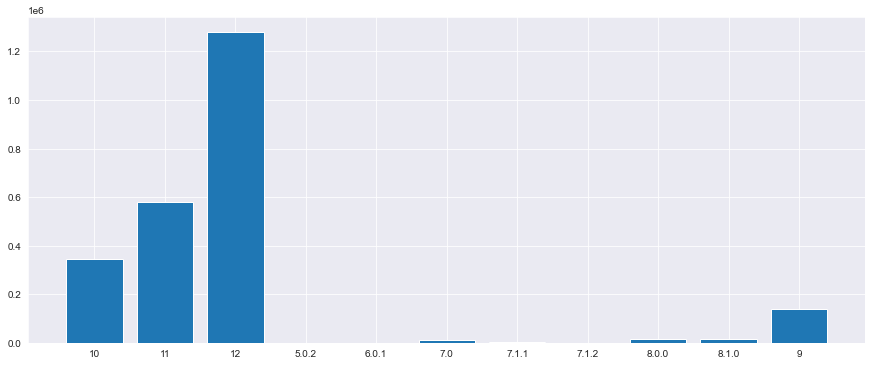

In [47]:
plt.figure(figsize=(15, 6))
plt.bar(x.index, x)
plt.show()

The reason that I described above concerned only average values, but now, as we can see, OS versions from 9 give the greatest profit to the company, and the statement above about the average level of earnings was erroneous due to the fact that the number of people and users with this version of the OS is small and the average value because of this they had a high

<h4>As a result, at the end of this research work, we can summarize the fact that the difference between the average value and the sum has a difference and there is no more correct answer either, namely which of the metrics gives the best result, but for this work the metric by amounts showed more correct data, because income there is a main indicator and direction for increasing the same income

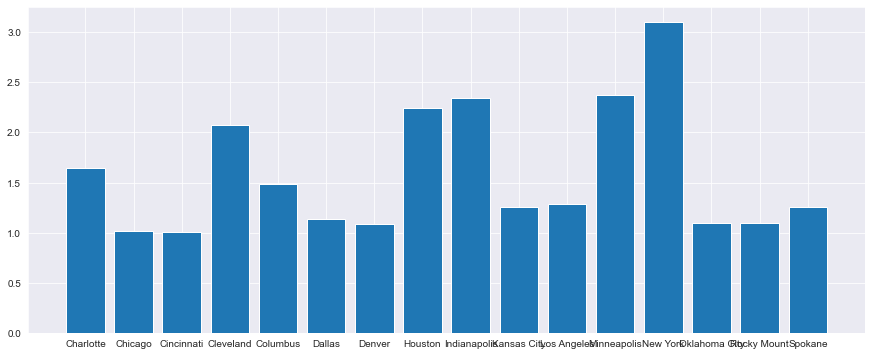

In [51]:
x = new_data.groupby('city')['eCPM'].sum()
new_x = x[x >= 15000]
value = (new_x / sum(x)) * 100
plt.figure(figsize=(15, 6))
plt.bar(new_x.index, value)
plt.show()

These cities also provide more than 100 percent of the company's profits.

In [56]:
new_data[['event_timestamp', 'eCPM', 'event_receive_timestamp']].corr(method='pearson')

,event_timestamp,eCPM,event_receive_timestamp
event_timestamp,1.000000,-0.026841,0.996487
eCPM,-0.026841,1.000000,-0.026289
event_receive_timestamp,0.996487,-0.026289,1.000000


The dependencies of the two data can be determined using correlations, which I applied in the study, as we can see the correlation is quite low and low over time since players can play games at different times, which gives such a low dependence